In [ ]:
!pip install --upgrade pip
!pip install pandas
!pip install scipy
!pip install seaborn
!pip install numpy
!pip install scikit-learn

## Немного статистики

### Базовые понятия мат. статистики

Для начала вспомнил, какими способами можно поисать поведение признаков (столбцов)

Например, существует числовой признак X = $[x1, x2, ... , X_n]$

Что можно сказать о P?

1. min, max

2. Среднее занчение $ \bar x = {x_1+x_2+...+p_n \over n} $

3. Медиана - такое число $h_x$ котороое делит выборку таким образом, что ровно половина элементов больше него, а другая половина элементов меньше. Например для выборки [1,3,5,5,15] $ \bar x = 5.8 $, а $ h_x = 5 $ 

То есть, в отсортированном массиве медиана - занчение по середине $ X[len(X)] \over 2 $. Для выборок с четным количеством элементов - медиана не оределена и считается как среднее между двумя соседями по середине. $ (X[(len(X) - 1) /2 ] + X[(len(X) + 1) /2]) \over 2 $


**Медиана vs Среднее**

Значение медианы не так сильно зависит от попадания в выборку аномально больших и аномально малых значений признака

**Симметричные выборки**

Если медиана и среднее близки к друг-другу, то выборка называется симметричной

Важность симметричных выборок - Для них проще искать аномалии4. Мода - значение которое наиболее часто встречается в выборке. Например модой для массива [1,2,1,1,6,5,9,102,1] будет 1. Мода не всегда определена однозначно. !!! Мода имеет смысл и для номинальных признаков

4. Мода - значение которое наиболее часто встречается в выборке. Например модой для массива [1,2,1,1,6,5,9,102,1] будет 1. Мода не всегда определена однозначно. !!! Мода имеет смысл и для номинальных признаков

5. Отклонение - среднее и медиана не достаточно для адекватного описания выборки. Например для наборов [0,0,0,0,0] и [-2,-1,0,1,2] $h_x = \bar x$, однако во второй выборке значения чаще отклоняются от от среднего.

Отклонение считается по формуле $ S_x = \sqrt{{1 \over{n-1}} * \displaystyle\sum_{i=1}^{n} {(x_i - \bar{x})}^2 } $

Для первой выборки из прмера отклонение = 0

Для второй выборки из примера отклонение = 1.58

** Свойства отклонения **

1. Отклонение всегда неотрицательно
2. Отклонение значений P = 0, если значения P равны друг-другу
3. Чем больше отклонение, тем сильнее разброс значений

### Симметричные выборки

Если $h_x$ близко к  $\bar x$, то выборка называется симметричной, когда выполняется неравенство:

модуль разности среднего и медианы <= 3*отклонение / sqrt(n)

$| \bar x - h_x | \leq { 3S_x \over \sqrt n}$

## Коэф корреляции

Необходима величина, которая показывает, как значения одного числовго признака, влияют или зависят от друго числовго признака. Также эта величина, должна иметь смысл для признаков выраженных через разные смысловие единины (кг и литры, метры и литры, ...)

**Пример зависимости между столбцами**
```
| X1 | X2  |  X3 | X4 | X5 |
|----|-----|-----|----|----|
| 0  | 1   | 0   | 10 | 8  |
| 1  | 0   | 200 | 13 | 6  |
| 2  | 1   | 400 | 16 | 4  |
| 3  | 63  | 600 | 19 | 2  |
```
Видна сильная зависиомсть между X1 и X3, X4, X5. Так как мы можем очень легко предсказать через выражения:

$X_3 = X_1 * 200$

$X_4 = 10 + X_1 *3$

$X_5 = 8 - 2 * X_1$

Показатель KK - показатель того, как переменные ложаться на прямую

**Если точки легко складываются на прямой, то зависимость существует, иначе сложно судить о зависимости**

Если простым языком, то коэф. корреляции показывает, как ваши данные ложатся на прямую. Ниже представлен пример того, как данные ложатся на прямую.

Как считается?

Пусть $X = [x_1,x_2,...,x_n]$, а $Y = [y_1,y_2,...,y_n]$

$ r(X, Y) = { \displaystyle\sum_{i=1}^{n} ({x_1 * y_x}) - (n * \bar {x} * \bar {y}) \over {(n-1) * S_X * X_Y} } $

**Свойства корреляции**

1. Число из отрезка [-1, 1]
2. Если KK = 0, то зависимости между X,Y - нет
3. Если КК > 0, то существует положительная зависимости (чем ближе к 1, тем сильнее). То есть при увеличении x - растет и y
4. Если КК < 0, то существует отрицательная звисимость (чем ближе к -1, тем сильнее). То есть при уменьшении x - уменьшается и y
5. Если |KK| равен 1, то существует сильная линейная зависимость

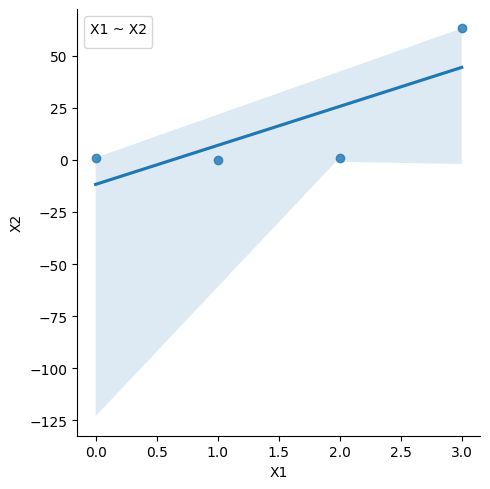

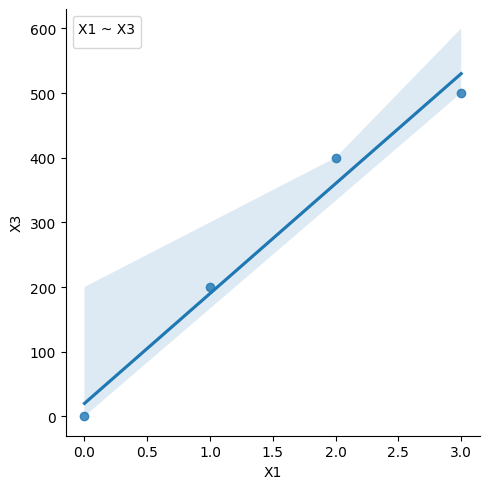

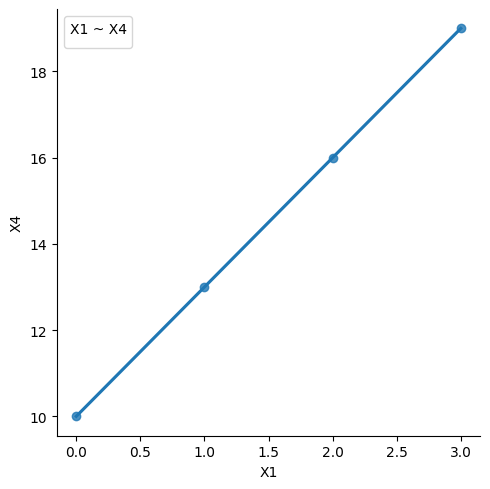

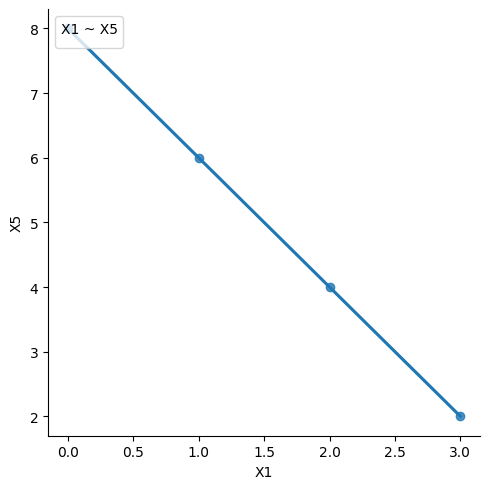

In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame(
        [
            [0,1,0,10,8],
            [1,0,200,13,6],
            [2,1,400,16,4],
            [3,63,500,19,2]
        ],
        columns=['X1', 'X2', 'X3', 'X4', 'X5']
)

y_test_columns = df.columns[1:]

for y_col in y_test_columns:
    g = sns.lmplot(
        data=df,
        x="X1", y=y_col,
    )
    g.set_axis_labels("X1", f"{y_col}")
    
    plt.legend(title=f'X1 ~ {y_col}', loc='upper left', labels=[])
    plt.show(g)


In [178]:
# через pandas
# берем только числоые значения, в нашем случае int64, наиболее чаще в дикой природе float64
float_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']] # | float64
df[float_cols].corr()

,X1,X2,X3,X4,X5
X1,1.000000,0.774508,0.989778,1.000000,-1.000000
X2,0.774508,1.000000,0.676404,0.774508,-0.774508
X3,0.989778,0.676404,1.000000,0.989778,-0.989778
X4,1.000000,0.774508,0.989778,1.000000,-1.000000
X5,-1.000000,-0.774508,-0.989778,-1.000000,1.000000


In [179]:
from pprint import pprint

def median(sample: list[float]) -> float:
    size = len(sample)
    start_index = int(size / 2)
    x = sorted(sample)
    
    if size % 2 != 0:
        median_index = start_index
        return x[median_index]
    
    median_left_child, median_right_child  = start_index - 1, start_index + 1

    return sum(x[median_left_child:median_right_child]) / 2

def mean(sample: list[float]) -> float:
    return sum(sample) / len(sample)


In [180]:
# медиана в нечетном множествет
x = sorted([1,3,5,5,15])

describe = {
    'mean': mean(x),
    'median': median(x)
}

pprint(describe)

{'mean': 5.8, 'median': 5}


In [181]:
# медиана в четном множестве
x = sorted([1,3,5,5,15, 102])

describe = {
    'mean': mean(x),
    'median': median(x)
}

pprint(describe)

{'mean': 21.833333333333332, 'median': 5.0}


## Обработка пропусков

### Простейшие способы обработки

Достаточно часто в дикой природе встречаются таблицы с прпоусками или заведомо ложными значениями.
Возникает вопрос, что делать в данном случае (пропуски, выбросы, аномалии, билеберда)?

Рассмотрим пример с такой таблицой, где часть ячеек не заполнена, а часть содержит некорректные данные

например, вес не может равнятся 649 кг, вероятно была совершена ошибка и оригинальное значение 64.09.

Место на олимпиаде не может быть отрицательным значением, исходя из описания переменной, вероятно это 4.

Также видно, что существуют пропуски. Эти значения нужно либо как-то заполнить либо как-то что

Скорее всего эти ошибки возникли из-за описки человека, который эту таблицу заполнял

In [182]:
import pandas as pd

df = pd.DataFrame(
    [
        ['Сидоров', 1, pd.NA, 84.0, 1],
        ['Козловский', 1, 76.0, 70, 3],
        ['Петрова', 0, 61, 649.0, -4],
        ['Казаков', pd.NA, 76.0, 56, 2]
    ],
    columns = ['Студент', 'Пол', 'Баллы_по_предмету', 'Вес', 'Место_на_WorldSkills']
)

df_base = df.copy()

df

,Студент,Пол,Баллы_по_предмету,Вес,Место_на_WorldSkills
0,Сидоров,1,<NA>,84.0,1
1,Козловский,1,76.0,70.0,3
2,Петрова,0,61,649.0,-4
3,Казаков,<NA>,76.0,56.0,2


## Какие существуют простые методы обработки

1. Удалить объект (строку)
2. Удалить столбец, если пропусков очень много + нет никаких зависимых переменных
3. Заменить значение на среднее (медиану, медиану, моду, ...) из значений столбца
4. Посчитать относительно расстояний соседей
5. Взять наиболее встречаемый признак у зависимых переменных
6. Использовать КК (коэффициент корреляции)

P.S. 1 и 2 способы крайне радикальные и их стоит применять с осторожностью. Так как удаляя объекты с равномерно распределенными пропусками, вы утратите данные

Например

### Простые примеры

In [183]:
from pprint import pprint
# Способ актуален для числовых признаков
mean = df.Баллы_по_предмету.mean()

median = df.Баллы_по_предмету.median()

freq = df.Баллы_по_предмету.mode()

describe = {
    'mean': df.Баллы_по_предмету.mean(),
    'median': df.Баллы_по_предмету.median(),
    'mode': df.Баллы_по_предмету.mode().iloc[0,],
}

pprint(describe)
# Какое значение из данных случаев подойдет для Сидорова
df

{'mean': 71.0, 'median': 76.0, 'mode': 76.0}


,Студент,Пол,Баллы_по_предмету,Вес,Место_на_WorldSkills
0,Сидоров,1,<NA>,84.0,1
1,Козловский,1,76.0,70.0,3
2,Петрова,0,61,649.0,-4
3,Казаков,<NA>,76.0,56.0,2


Как быть с номинальными признаками?

В качестве примера рассмотрим пол

- Заменить пропуски на моду (1)
- Рандомизировать поиск. С вероятность < 2/3 считать как 1, с вероятность больше чем 1/3 считать 0
- Объявить пол "числовым" и применить к нему методы восстановления для числовых значений
- Более сложные способы восстановления (ближайшие соседи, постановка гипотез относительно этой переменной)


In [184]:
# Способ актуален для номинальных признаков признаков
# Пол - считаем моду
index = df_base[df_base.Пол.isnull()].index[0]

df.at[index, 'Пол'] = df_base.Пол.mode().iloc[0]
df

,Студент,Пол,Баллы_по_предмету,Вес,Место_на_WorldSkills
0,Сидоров,1,<NA>,84.0,1
1,Козловский,1,76.0,70.0,3
2,Петрова,0,61,649.0,-4
3,Казаков,1,76.0,56.0,2


In [185]:
# Вес считаем по среднему значению
mean_weight = df_base.Вес[(df_base.Вес < 100)].mean()
index = df_base[df_base.Вес == 649].index[0]

df.at[index, 'Вес'] = mean_weight
df

,Студент,Пол,Баллы_по_предмету,Вес,Место_на_WorldSkills
0,Сидоров,1,<NA>,84.0,1
1,Козловский,1,76.0,70.0,3
2,Петрова,0,61,70.0,-4
3,Казаков,1,76.0,56.0,2


In [186]:
# делаем abs для места на соревновании
import numpy as np

df.Место_на_WorldSkills = np.abs(df.Место_на_WorldSkills.to_numpy())
df

,Студент,Пол,Баллы_по_предмету,Вес,Место_на_WorldSkills
0,Сидоров,1,<NA>,84.0,1
1,Козловский,1,76.0,70.0,3
2,Петрова,0,61,70.0,4
3,Казаков,1,76.0,56.0,2


### КК

Для восстановления значения с помощью КК, нужно придумать формулу, и к счастью такая есть:

$X(A)$ - значение признака $X$ объекта $A$

$\bar X$ - среднее значение признака X

определить $ X(A) $ по столобцам признакам $ X_1, X_2, ..., X_n $

$ X(A) = \bar X + { \displaystyle\sum_{i=1}^{n} r(X, X_i) * (X_i(A) - \bar X_i) \over \displaystyle\sum_{i=1}^{n} |r(X, X_i)|   }   $

Примечание:
1) нормировать не обязтаельно, тк КК уже подразумевает под собой номирование
2) рассчеты (средних и корреляций) происходят **без учета строки, которую пытаемся найти**
3) чем сильнее КК, тем больший вклад производит переменная. То есть, если корреляции нет, то можно не использовать

In [187]:
# Хотим восстановить баллы по предмету в зависимости от веса (пример не очень, но для примера подойдет)
# Нормировать не обязательно, т.к. КК в себе уже нормирует
df_corr = pd.DataFrame([[68.2, 180.4, 18], [74.3, 176.1, 20], [60.3, 170.5, 21], [40.0, 150.0, 12], [80.0, None, 14]], columns=['weight', 'height', 'age'])

nan_index = df_corr.index[df_corr.height.apply(pd.isna)][0]

print(df_corr)
print()
print(df_corr.corr())

mean_weight, mean_age, mean_height = df_corr.dropna().weight.mean(), df_corr.dropna().age.mean(), df_corr.dropna().height.mean()
weight_corr, age_corr = df_corr.corr()['height'].iloc[0], df_corr.corr()['height'].iloc[2]
print()
print(f'mean weight: {mean_weight}, mean_age: {mean_age}, mean_height: {mean_height}')
print(f'weight_height_corr: {round(weight_corr, 2)}, age_height_corr: {round(age_corr, 2)}')

numerator = weight_corr*(df_corr.weight.iloc[nan_index] - mean_weight) + age_corr * (df_corr.age.iloc[nan_index] - mean_age) # числитель
denominator = abs(weight_corr) + abs(age_corr) # знаменатель

empty_height = mean_height + (numerator/denominator)

df_corr.height.at[nan_index] = empty_height
print()
df_corr

   weight  height  age
0    68.2   180.4   18
1    74.3   176.1   20
2    60.3   170.5   21
3    40.0   150.0   12
4    80.0     NaN   14

          weight    height      age
weight  1.000000  0.952679  0.38302
height  0.952679  1.000000  0.81687
age     0.383020  0.816870  1.00000

mean weight: 60.7, mean_age: 17.75, mean_height: 169.25
weight_height_corr: 0.95, age_height_corr: 0.82



,weight,height,age
0,68.2,180.400000,18
1,74.3,176.100000,20
2,60.3,170.500000,21
3,40.0,150.000000,12
4,80.0,177.909516,14


### Восстановка с помощью метрик (Мера близости)

Метрика - понятие из геометрии, может быть рассчитана для объектов произвольный припроды.

Задача - найти значение метрики на паре $X$, $Y$, где $X = [x_1,x_2,..,x_n] $, $ Y = [y_1, y_2, ..., y_n] $

1. Евклидова метрика (из учбеника по геометрии) $ p(X,Y) = \sqrt { (x_1 - y_1)^2 + (x_2 - y_2)^2 + ... (x_n - y_n)^2 } $

2. [Метрика Манхеттен](https://math.fandom.com/ru/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BE%D1%80%D0%BE%D0%B4%D1%81%D0%BA%D0%B8%D1%85_%D0%BA%D0%B2%D0%B0%D1%80%D1%82%D0%B0%D0%BB%D0%BE%D0%B2) $ p(X,Y) = |x_1 - y_1| + |x_2 - y_2| + ... + (x_n - y_n) $

3. Max Метрка $ p(X,Y) = max(|x_1 - y_1|, |x_2 - y_2|, ..., |(x_n - y_n)|) $

4. [И так далее, желательно почитать](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)

5. Можно придумать свою, но обязтально выполнение свойств

**Свойства метрик**
- $p(X, X) = 0$, расстояние об объекта до него же самого равно 0
- $p(X,Y) = p(Y,X)$, одинаковые точки должны быть равны
- $p(X,Y) <= p(X, M) + p(M, Y)$, расстояние от X до Y, должна быть меньше суммы расстояний пройденные через промежуточные точки

Как использовать метрики?💡

Необходимо рассчитать расстояние от $X$ до других объектов, чтобы найти наиболее близкие объекты к $X$.
Тогда значения Признака $X_p$ из ближайших $k$ объектов можно взять за значение  $X_p$ 

1. Исключаем столбец из с признаком $K$
2. Найдем расстояние от $X$ до остальных объектов $p(X, X_1)$, $p(X, X_2)$, ..., $p(X, X_3)$
3. Пусть значения признака $K$ Для объектов $X_1, X_2, ... X_n$ равны $P(X_1)$, $P(X_2)$, ..., $P(X_n)$

**Важное примечание, перед использованием данных методов, необходимо провести нормирование см. Замечание об использованиях метрик**

In [188]:
import math 
import numpy as np

def calc_metric(sample1: np.array, sample2: np.array, formula: str) -> float:

    fn = {
        'euclid': lambda : np.sqrt(np.sum(np.square(sample1 - sample2))),
        'manhattan': lambda : np.sum(np.abs(sample1 - sample2)),
        'max': lambda : np.max(np.abs(sample1 - sample2))
    }

        
    return fn[formula]()

df

,Студент,Пол,Баллы_по_предмету,Вес,Место_на_WorldSkills
0,Сидоров,1,<NA>,84.0,1
1,Козловский,1,76.0,70.0,3
2,Петрова,0,61,70.0,4
3,Казаков,1,76.0,56.0,2


In [189]:
# Массив коэфициентов расстояний объектов
metrics_result = []

df_test = df[df.columns[[1,3,4]]]

x = df_test.loc[df.Баллы_по_предмету.isnull()].to_numpy()

for columns, values in df_test[~df.Баллы_по_предмету.isnull()].iterrows():
    x2 = values.to_numpy()
    metric_value = calc_metric(x, x2, 'euclid')
    metrics_result.append(metric_value)
    print('metric:', metric_value)
    
values = df[~df.Баллы_по_предмету.isnull()].Баллы_по_предмету.to_numpy()
metrics_result = np.array(metrics_result)

normal = 1 / np.sum(1 / metrics_result) # коэфициент нормализации, нужен т.к. если расстояние близкое - то значение большое, иначе малое

score = np.sum(np.divide(values, metrics_result)) * normal # вычисляем результат


metric: 14.142135623730951
metric: 14.352700094407323
metric: 28.0178514522438


In [190]:
df_copied = df.copy()

df_copied.at[0, 'Баллы_по_предмету'] = score
df_copied

,Студент,Пол,Баллы_по_предмету,Вес,Место_на_WorldSkills
0,Сидоров,1,70.064481,84.0,1
1,Козловский,1,76.0,70.0,3
2,Петрова,0,61,70.0,4
3,Казаков,1,76.0,56.0,2


Вообщем обработка пропусков это большая сложная тема, нет конкретно четкой методики, как поступить в той или иной ситуации.

**[Дополнительно почитать, как можно обработать пропуски](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e)**

### Замечание об использованиях метрик

Например (таблица роста и веса)

In [191]:
df_example = pd.DataFrame(
    [
        [61, 1.78],
        [65, 1.79],
        [70, 1.6]
    ],
    columns=['Вес', 'Рост(м)']
)

df_example

,Вес,Рост(м)
0,61,1.78
1,65,1.79
2,70,1.60


Когда мы будем вычислять разницу в весе - получим большие значения, а когда в росте - слишком маленькие, фактически, рост будет проигнорирован (примером выше является пол и место).

Это происходит из-за разницы в масштабах и приведет к неадекватной оценке. **Данное понятие относится и к остальным методам, которые будут рассмотреты дальше**
В таком случае приходит новое понятие - нормирование.

Способы нормирования
1. MinMaxScale. $x'_i = {  { {x_i} - min{x_i} } \over {max{x_i} - min{x_i} } } $

2. Стандартизация (ср. значение и отклонение будут равны 0, 1 соответственно). $x'_i = { {x_i - \bar{x}} \over s }$, где s - отклонение. В практике более станадртный способ

3. Разлиные пребразования перед нормировкой (например применить логарифм). Когда оправдано? Когда есть например такая последовательность [1, 10, 100, 1000, 10000, ..., n]

в skelarn все есть! Вернемся к предыдущей таблице

In [192]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [193]:
# при таком способе минимальное значение станет 0, максимальное 1
df_copied = df_copied

weight = MinMaxScaler().fit_transform(df_copied.Вес.to_numpy().reshape(-1, 1))
print('original:  ', df_copied.Вес.to_numpy())
print('processed: ', weight)

original:   [84. 70. 70. 56.]
processed:  [[1. ]
 [0.5]
 [0.5]
 [0. ]]


In [194]:
weight = StandardScaler().fit_transform(df_copied.Вес.to_numpy().reshape(-1, 1))
print('original:  ', df_copied.Вес.to_numpy())
print('processed: ', weight)

df_copied.Вес = weight

original:   [84. 70. 70. 56.]
processed:  [[ 1.41421356]
 [ 0.        ]
 [ 0.        ]
 [-1.41421356]]


In [195]:
estimation = StandardScaler().fit_transform(df_copied.Баллы_по_предмету.to_numpy().reshape(-1, 1))
print('original:  ', df_copied.Баллы_по_предмету.to_numpy())
print('processed: ', estimation)

df_copied.Баллы_по_предмету

original:   [70.06448107928277 76.0 61 76.0]
processed:  [[-0.11432733]
 [ 0.85282505]
 [-1.59132277]
 [ 0.85282505]]


0    70.064481
1         76.0
2           61
3         76.0
Name: Баллы_по_предмету, dtype: object

Примечание о номинальных значениях

Есть несколько способов обрабортки:
1) принимаем, что это числовое значение и занимаемся обаботкой как число (в большинстве случаев является не уместным способ)
2) превращаем в отдельные колонки - то что нужно! [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

In [196]:
# Примечание о категориальных значениям
import pandas as pd
win_place_series = pd.get_dummies(df_copied.Место_на_WorldSkills)
print(win_place_series) # получаем колонки с каждым местом, колонкой является место, а значением 1 соотвествует месту соответсвующей колонки

win_place_series = pd.get_dummies(df_copied.Место_на_WorldSkills, prefix='win_place') # с префиксом работать удобнее
print(win_place_series)

df_copied = pd.concat([df_copied,win_place_series], axis=1).drop('Место_на_WorldSkills', axis=1)

   1  2  3  4
0  1  0  0  0
1  0  0  1  0
2  0  0  0  1
3  0  1  0  0
   win_place_1  win_place_2  win_place_3  win_place_4
0            1            0            0            0
1            0            0            1            0
2            0            0            0            1
3            0            1            0            0


In [197]:
df_copied

,Студент,Пол,Баллы_по_предмету,Вес,win_place_1,win_place_2,win_place_3,win_place_4
0,Сидоров,1,70.064481,1.414214,1,0,0,0
1,Козловский,1,76.0,0.000000,0,0,1,0
2,Петрова,0,61,0.000000,0,0,0,1
3,Казаков,1,76.0,-1.414214,0,1,0,0


**Для большинства методов преобработки, необходимо привести признаки в одниаковую плоскость!!!**

In [198]:
#Когда есть пропуски - делаем так
df_copied = df.copy()
df_copied

,Студент,Пол,Баллы_по_предмету,Вес,Место_на_WorldSkills
0,Сидоров,1,<NA>,84.0,1
1,Козловский,1,76.0,70.0,3
2,Петрова,0,61,70.0,4
3,Казаков,1,76.0,56.0,2


In [199]:
scaler = StandardScaler().fit(df[~df.Баллы_по_предмету.isnull()].Баллы_по_предмету.to_numpy().reshape(-1, 1))

In [200]:
df_copied.Баллы_по_предмету =  df.Баллы_по_предмету.apply(
    lambda x: x if pd.isna(x) else scaler.transform(np.array(x).reshape(-1, 1)).reshape(1)[0]
)

In [201]:
df_copied

,Студент,Пол,Баллы_по_предмету,Вес,Место_на_WorldSkills
0,Сидоров,1,<NA>,84.0,1
1,Козловский,1,0.707107,70.0,3
2,Петрова,0,-1.414214,70.0,4
3,Казаков,1,0.707107,56.0,2
